In [57]:
import pandas as pd 
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import seaborn as sn
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\srith\Desktop\ScienceFair2022_2023\AnginaCleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  107 non-null    int64
 1   rca         107 non-null    int64
 2   lad         107 non-null    int64
 3   cx          107 non-null    int64
 4   score       107 non-null    int64
 5   volumemm3   107 non-null    int64
dtypes: int64(6)
memory usage: 5.1 KB


In [44]:
x_train, x_test = train_test_split(df, test_size=0.1,random_state=2)

In [45]:
train_label=x_train['score']
test_label=x_test['score']

In [46]:
x_train.drop(['score'], axis=1,inplace=True)
x_test.drop(['score'], axis=1,inplace=True)

C:\Users\srith\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
model = GaussianNB()

model.fit(x_train,train_label)

pred = model.predict(x_test)

In [48]:
print("Accuracy:",(metrics.accuracy_score(test_label, pred)*100),"%")

Accuracy: 72.72727272727273 %


In [18]:
cf_matrix = confusion_matrix(test_label, pred)

<AxesSubplot:>

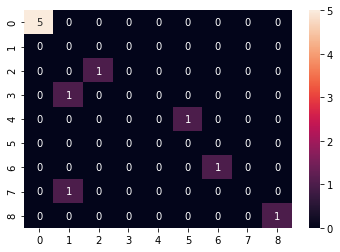

In [19]:
sn.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

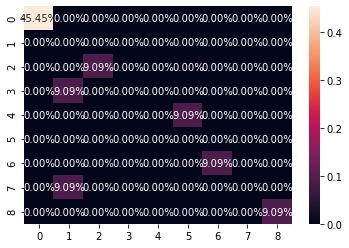

In [23]:
sn.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

<AxesSubplot:>

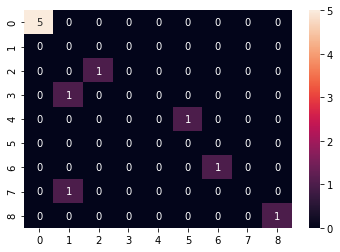

In [55]:
#labels = ['True Neg' ,'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(8,8)
sn.heatmap(cf_matrix, annot=True, fmt='')

In [74]:
cr = metrics.classification_report(test_label, pred, zero_division = 1, output_dict = True)
print(cr)

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, '3': {'precision': 0.0, 'recall': 1.0, 'f1-score': 0.0, 'support': 0}, '34': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, '213': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '389': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '425': {'precision': 0.0, 'recall': 1.0, 'f1-score': 0.0, 'support': 0}, '488': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, '2413': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '3743': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'accuracy': 0.7272727272727273, 'macro avg': {'precision': 0.7777777777777778, 'recall': 0.6666666666666666, 'f1-score': 0.4444444444444444, 'support': 11}, 'weighted avg': {'precision': 1.0, 'recall': 0.7272727272727273, 'f1-score': 0.7272727272727273, 'support': 11}}


<AxesSubplot:>

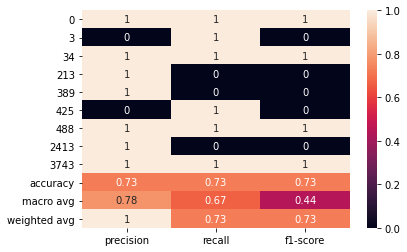

In [75]:
sn.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True)